# Convolution and correlation Khaliq Aghakarimov

### Import Khaliq Aghakarimov

In [0]:
%reset -f

In [0]:
import numpy as np 
np.set_printoptions(linewidth=50000,precision=1,suppress=True,)

import scipy
import scipy.signal
import scipy.fftpack

import  matplotlib.pyplot as plt
plt.style.use("default")

## Definition of the convolution product Khaliq Aghakarimov

Considere two vectors $a$ ans $v$. The convolution product between them is defined by: 
$$
(a \star v ) [n] = \sum_j a[j] \  v[n-j]
$$
Remark: $v[n-j]$ must be defined. Mathematicaly, we can imagine that $v[k]$ is defined for all $k\in\mathbb Z$. But informaticaly ...  




## 3 possible modes Khaliq Aghakarimov

We consider a signal ("long" vector)

In [0]:
"a signal"
a=np.array([0,0,1,2,1,0,0,0,1,0])
print(a)

[0 0 1 2 1 0 0 0 1 0]


We consider a mask : a short vector which want to modify the previous signal. 

In [0]:
"a mask"
v=np.array([0,1,2])
print(v)

[0 1 2]


In [0]:
av= np.convolve(a,v,mode='valid')
print(av)

[0 1 4 5 2 0 0 1]


Explanation: Recall the formula:
$$
(a \star v ) [n] = \sum_j a[j] \  v[n-j]
$$

* We have to consider the reversed version of `v`. 
* We decay this version along the vector `a`. 
* For each decay we multiply the two vectors, and sum up. 

The mode=`valid` indicate that we chose only the decays where the mask is included in the signal:

    [0 0 1 2 1 0 0 0 1 0]
    [2 1 0]
    => av[0] =0
    
    
    [0 0 1 2 1 0 0 0 1 0]
      [2 1 0]
    => av[1] =1
      
      
    [0 0 1 2 1 0 0 0 1 0]
        [2 1 0]
    => av[2] = 4
    
    
      
    [0 0 1 2 1 0 0 0 1 0]
          [2 1 0]
    => av[3] = 5
    
    ...
        
           
      
    [0 0 1 2 1 0 0 0 1 0]
                  [2 1 0]
    => av[7] = 1
     

In [0]:
av= np.convolve(a,v,mode='full')
print(av)

[0 0 0 1 4 5 2 0 0 1 2 0]


Explanation: the mode=`full` indicate that we make all the decays such that the mask intersect the signals. 


        [0 0 1 2 1 0 0 0 1 0]
    [2 1 0]
    => av[0] =0
    
    
        [0 0 1 2 1 0 0 0 1 0]
      [2 1 0]
    => av[1] =0
    
       
        [0 0 1 2 1 0 0 0 1 0]
        [2 1 0]
    => av[2] =0
    
        
        [0 0 1 2 1 0 0 0 1 0]
          [2 1 0]
    => av[3] =1
    
    ...
    
          
        [0 0 1 2 1 0 0 0 1 0]
                          [2 1 0]
    => av[11] = 0
    
    
    etc. 
    


In [0]:
av= np.convolve(a,v,mode='same')
print(av)

[0 0 1 4 5 2 0 0 1 2]


In [0]:
len(av),len(a)

(10, 10)

With the mode=`same`, we choose the decay in order that the result has the same size as the bigger vector:  



        [0 0 1 2 1 0 0 0 0 0]
      [2 1 0]
    => av[0] =0
    
    ...
    
    
        [0 0 1 2 1 0 0 0 0 0]
                        [2 1 0]
    => av[9] =0
    
    

**Remark:** All this explanation are written on the documentation: 

        np.convolve?


## Application Khaliq Aghakarimov

### To derivate a signal Khaliq Aghakarimov

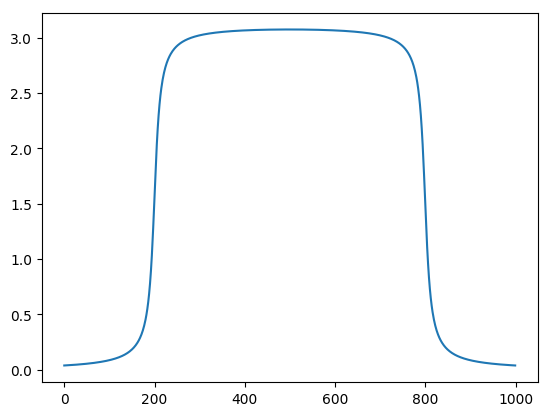

In [0]:
def buildSignal():
    a=50
    dec=30
    x=np.linspace(-a,a,1000)
    y1=np.arctan(x+dec)
    y2=np.arctan(-x+dec)
    return y1+y2

y=buildSignal()
plt.plot(y);

Let's compute the first discrete derivative

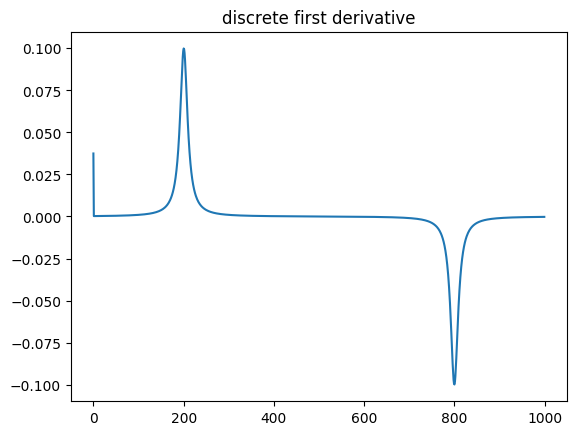

In [0]:
y_decay_right=np.zeros_like(y)
y_decay_right[1:]=y[:-1]

yDiff =  (y - y_decay_right)
plt.title("discrete first derivative")
plt.plot(yDiff);

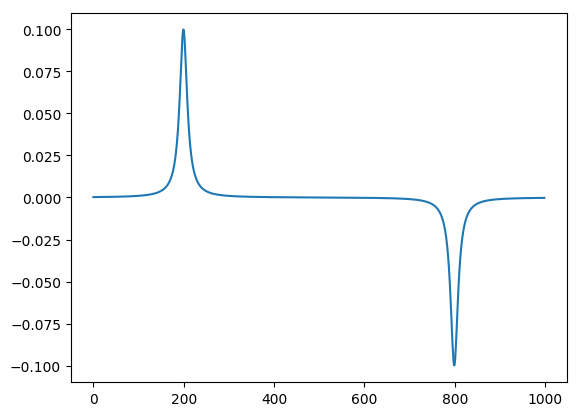

In [0]:
y_cor=np.convolve(y,[1,-1],mode="valid")
plt.plot(y_cor);

Let's compute now the second discrete derivative

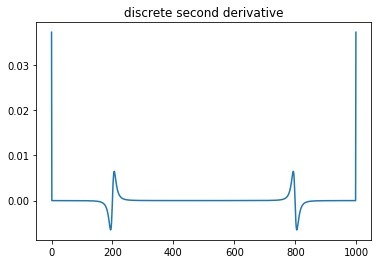

In [0]:
y_decay_left=np.zeros_like(y)
y_decay_left[:-1]=y[1:]

y_diff2=2*y-y_decay_left-y_decay_right
plt.title("discrete second derivative")
plt.plot(y_diff2);

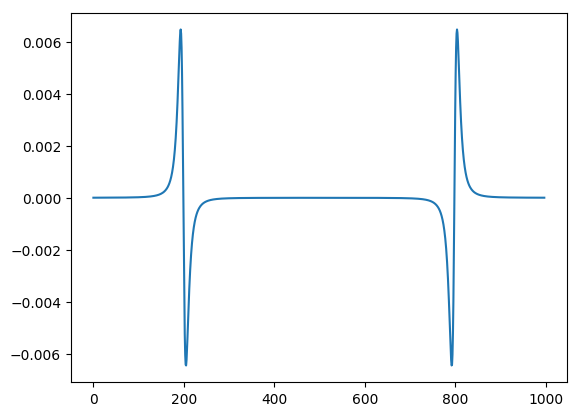

In [0]:
y_pp2=np.convolve(y,[1,-2,1],mode="valid")
plt.plot(y_pp2);

**Remarks:** generalizations of this convolution in 2D allows to detect  edges into images.

## To smooth a signal Khaliq Aghakarimov

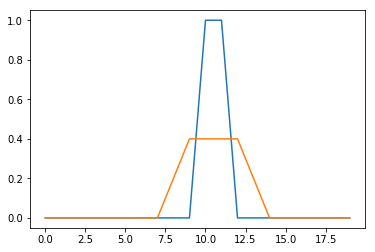

In [0]:
signal=np.zeros(20)
signal[10:12]=1

mask=np.array([1,1,1,1,1])/5

plt.plot(signal)
plt.plot(np.convolve(signal,mask,mode="same"));

Such convolution is also called: the rolling-mean. 

Similar convolutions in 2D, could perform some denoising in images. 

In one dimension is could smooth signals

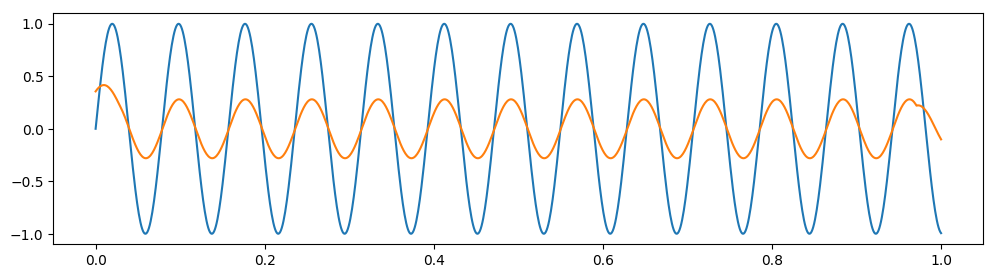

In [0]:
t=np.linspace(0,1,1000)
sig=np.sin(80*t)


mask_width=60 #try to increase this number
mask=np.ones([mask_width])/mask_width

fig,ax=plt.subplots(figsize=(12,3))
ax.plot(t,sig)
ax.plot(t,np.convolve(sig,mask,mode="same"))


## Definition of the correlation product Khaliq Aghakarimov

Very similar to the convolution
$$
a*v[k] =\sum_n  a[n+k] * v[n]
$$
When vectors are complex, we hadd a conjugaison on the second termp. 


In [0]:
a=[0,0,1,2,1]
v=[3,1]
av=np.correlate(a,v,mode="valid")
print(av)

[0 1 5 7]


Same idea, but now we do not reverse one of the vector:

    [0,0,1,2,1]
    [3,1]
    
    [0,0,1,2,1]
      [3,1]
    
    [0,0,1,2,1]
        [3,1]
            
    [0,0,1,2,1]
          [3,1]


The correlation is often use to know which is the best decay to make coïncide 2 signals. 

This best decay is given by the argmax of the correlation. On the above example:

    argmax(av) = 4
    
so the best decay is 4, as we can easily saw.

## Convolution and Fourier Khaliq Aghakarimov

The convolution product can be computed very fast using the FFT algorithm. Do do this, use:

    scipy.signal.fftconvolve

The correlation can also be computed very fast (you just have to reverse `v`). It is important when you have two wide signals and when you want to look for the best decay so that the two signals match (coincide). As example, this is usefull to stick several photo to make a "panoramic" photo.  


When you want to filter a signal you can 

* Either use its discrete Fourier transform (to cancel some frequencies)

* Either use some convolution (ex: using a smoothing mask to cancel the hight frequecies).

Theoriticaly, this two technics are  equivalent, but in practice you have to choose:  

* for 1D signal, I advice you to always use the FFT. It is easier to precisely rules your filtering. 

* For images, we often prefer convolutions, especialy with small mask. Actually, most of the deeplearning algorithm are based on convolutions:  images (or sound, or dialogues) are analyse by performing many many convolution whose mask are automaticaly rules by some optimization algorithm. 


##  Be carefull of the vocabulary:  Khaliq Aghakarimov

* some times the term 'correlation' (or cross-correlation) also include the fact to center-reduce the two vectors `a` and `v` prior to make the correlation that we had presented (see the Annex to know the meaning of 'center-reduce).  Example, when you want to match two photos, it is important to center-reduce them before, because the exposure can be differents. 


* In many python library (ex: deep learning lib), the convolution is defined like our correlation: no minus sign. 


General advice: always look precisely the documentation of the lib that you use. The sens of the "mathematical terms" are often modified in the applications. There are no "patents" on scientifical words. 


## Annexe: To center-reduce a signal Khaliq Aghakarimov

To center a signal is to substract its mean

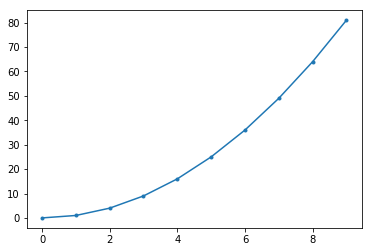

In [0]:
t=np.arange(10)
signal=(t)**2
plt.plot(t,signal,'.-');

In [0]:
mean=np.mean(signal)
mean

28.5

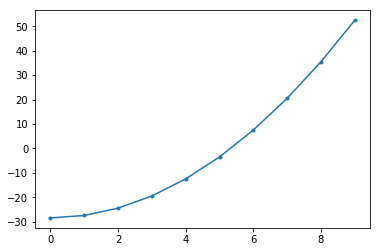

In [0]:
signal_cen=signal-mean
plt.plot(t,signal_cen,'.-');

To center and reduce a signal to center it, and then divide it by its standart deviation:

In [0]:
std=np.std(signal)
std

26.852374196707448

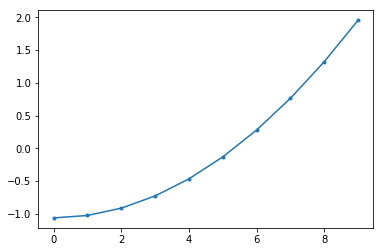

In [0]:
signal_cr=(signal-mean)/std
plt.plot(t,signal_cr,'.-');

We often center-reduce signals to put them on a resonnable "scale". 

This allows as example to compare the shape of two very different signals.

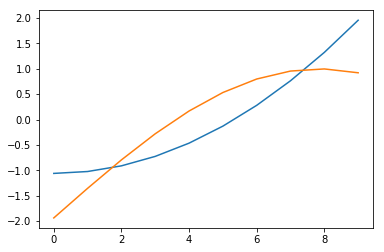

In [0]:
signal2=np.sin(t/5)

signal2_cr=(signal2-np.mean(signal2))/np.std(signal2)

plt.plot(t,signal_cr)
plt.plot(t,signal2_cr);

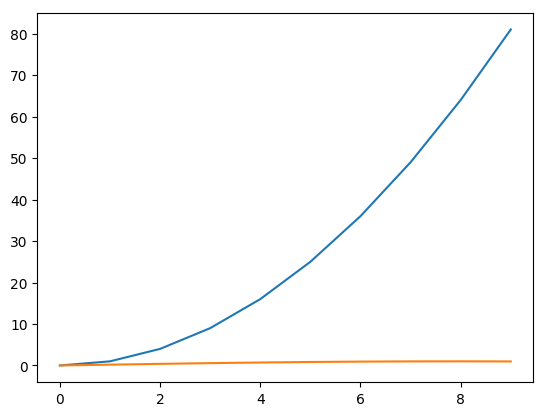

In [0]:
plt.plot(t,signal)
plt.plot(t,signal2);